<a href="https://colab.research.google.com/github/NandaniMavani/X/blob/master/CS666_Assignment_1_Nandani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

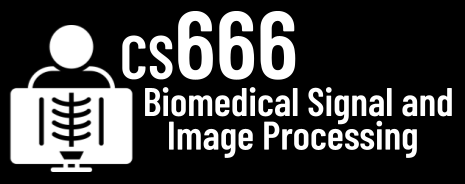

# Assignment 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.8 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
signal, metadata = storage.load_txt('/content/drive/MyDrive/Colab Notebooks/ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [5]:
SAMPLING_RATE = 1000
SECONDS = 0.001

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [26]:
import biosppy
processed = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=1000.0, show=False)
print(processed)

ReturnTuple(ts=array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.4997e+01, 1.4998e+01,
       1.4999e+01]), filtered=array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748]), rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]), templates_ts=array([-2.00000000e-01, -1.99000000e-01, -1.98000000e-01, -1.97000000e-01,
       -1.96000000e-01, -1.95000000e-01, -1.94000000e-01, -1.93000000e-01,
       -1.92000000e-01, -1.91000000e-01, -1.90000000e-01, -1.89000000e-01,
       -1.88000000e-01, -1.87000000e-01, -1.86000000e-01, -1.85000000e-01,
       -1.84000000e-01, -1.83000000e-01, -1.82000000e-01, -1.81000000e-01,
       -1.80000000e-01, -1.79000000e-01, -1.78000000e-01, -1.77000000e-01,
       -1.76000000e-01, -1.75000000e-01, -1.74000000e-01, -1.73000000e-01,
       -1.72000000e-01, -1.71000000e-01, -1.70000000e-01, -1.69000000e-01,
       -1.68000000e-01, -1.67000000e-01, -1

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

(0.0, 3000.0)

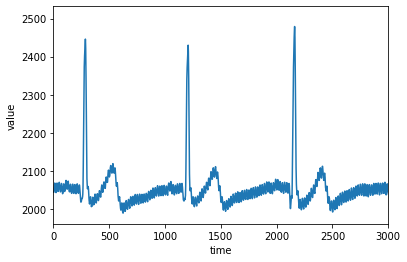

In [23]:
### TODO plot unfiltered
x = [0*SAMPLING_RATE, 3*SAMPLING_RATE]
plt.xlabel("time")
plt.ylabel("value")
plt.plot(signal)
plt.xlim(x)

(0.0, 3000.0)

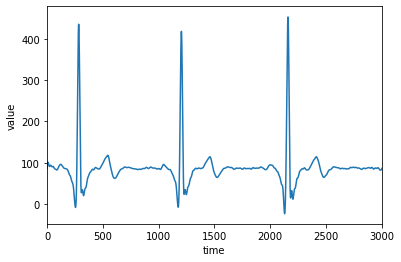

In [27]:
### TODO plot filtered signal
x = [0*SAMPLING_RATE, 3*SAMPLING_RATE]
plt.xlabel("time")
plt.ylabel("value")
plt.plot(processed['filtered'])
plt.xlim(x)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

ReturnTuple(rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]))


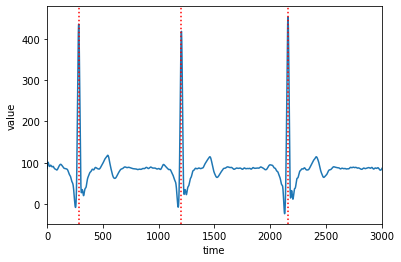

In [34]:
### TODO
temp = biosppy.signals.ecg.christov_segmenter(signal=processed['filtered'], sampling_rate=1000.0)
print(temp)
x = [0*SAMPLING_RATE, 3*SAMPLING_RATE]
plt.xlabel("time")
plt.ylabel("value")
plt.plot(processed['filtered'])
plt.xlim(x)
plt.axvline(x = 283, color = 'r', ls=':')
plt.axvline(x = 1204, color = 'r', ls=':')
plt.axvline(x = 2159, color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [11]:
!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

In [56]:
# TODO Does the detection work well?
print("yes")

yes


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


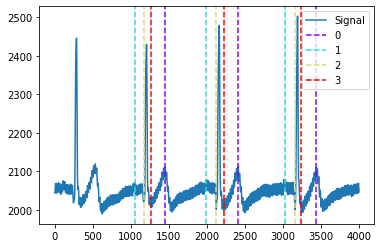

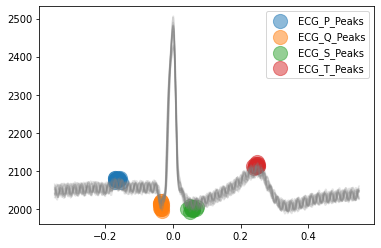

In [55]:
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[:4000])

_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


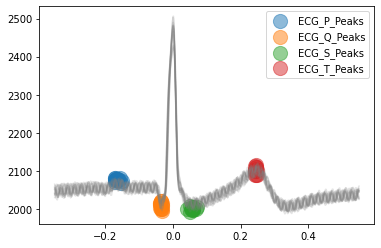

In [62]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


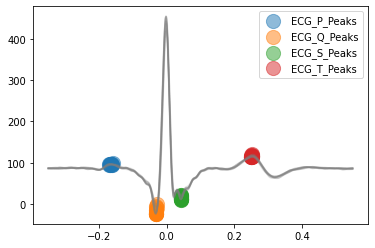

In [64]:
filtered = nk.signal_filter(processed['filtered'], lowcut=5, highcut=80)
_, waves_peak = nk.ecg_delineate(processed['filtered'], rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#